In [4]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks
from PIL import Image

In [5]:
def generate():
    img = np.zeros((32, 32), dtype=float)
    size = random.randint(3, 9)
    pos_x = random.randint(0, 31 - size)
    pos_y = random.randint(0, 31 - size)
    img[pos_x:pos_x + size, pos_y:pos_y + size] = 255.0
    
    return img, size, pos_x, pos_y

In [6]:
def display(img):
    return Image.fromarray(img).convert("L")

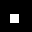

In [7]:
img, _, _, _ = generate()
display(img)

In [29]:
X = []
y = []
for i in range(10000):
    t = generate()
    X.append(t[0] / 255.0)
    y.append((t[1] / 10, t[2] / 32, t[3] / 32))

In [265]:
def l_model(conv_filters = 4):
    inp = layers.Input((32, 32, 1))
    conv_1_1 = layers.Conv2D(conv_filters, 3, padding='same', activation='relu')(inp)
    pool_1_1 = layers.MaxPool2D()(conv_1_1)
    
    conv_2_1 = layers.Conv2D(conv_filters, 3, padding='same', activation='relu')(pool_1_1)
    pool_2_1 = layers.MaxPool2D()(conv_2_1)
    
    conv_3_1 = layers.Conv2D(conv_filters, 3, padding='same', activation='relu')(pool_2_1)
    pool_3_1 = layers.MaxPool2D()(conv_3_1)
    
    conv_4_1 = layers.Conv2D(conv_filters*2, 3, padding='same', activation='relu')(pool_3_1)
    pool_4_1 = layers.MaxPool2D()(conv_4_1)
    
    conv_5_1 = layers.Conv2D(conv_filters*4, 3, padding='same', activation='relu')(pool_4_1)
    pool_5_1 = layers.MaxPool2D()(conv_5_1)
    
    conv_6_1 = layers.Conv2D(3, 1, activation='relu')(pool_5_1)
    
    
    out = layers.Flatten()(conv_6_1)
    return models.Model(inp, out)

In [266]:
model = l_model()

In [267]:
def loss(y_true, y_pred):
    return losses.MSE(y_true, y_pred)

model.compile(optimizer=optimizers.Adam(), 
              loss=loss,
              metrics=['accuracy']
)

In [269]:
model.fit(
    np.asarray(X).reshape(-1, 32, 32, 1), 
    np.asarray(y),
    batch_size=1,
    validation_split=0.2
)

model.fit(
    np.asarray(X).reshape(-1, 32, 32, 1), 
    np.asarray(y),
    batch_size=8,
    validation_split=0.2
)


model.fit(
    np.asarray(X).reshape(-1, 32, 32, 1), 
    np.asarray(y),
    epochs=128,
    batch_size=64,
    validation_split=0.2
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 73s 9ms/step - loss: 0.0045 - acc: 0.9144 - val_loss: 6.0696e-04 - val_acc: 0.9680
Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 7s 931us/step - loss: 4.2343e-04 - acc: 0.9685 - val_loss: 4.0145e-04 - val_acc: 0.9740
Train on 8000 samples, validate on 2000 samples
Epoch 1/128
8000/8000 [==============================] - 1s 99us/step - loss: 3.3634e-04 - acc: 0.9725 - val_loss: 3.1052e-04 - val_acc: 0.9720
Epoch 2/128
8000/8000 [==============================] - 1s 89us/step - loss: 3.1881e-04 - acc: 0.9735 - val_loss: 3.0162e-04 - val_acc: 0.9780
Epoch 3/128
8000/8000 [==============================] - 1s 161us/step - loss: 3.1108e-04 - acc: 0.9732 - val_loss: 2.9409e-04 - val_acc: 0.9775
Epoch 4/128
8000/8000 [==============================] - 1s 126us/step - loss: 3.0315e-04 - acc: 0.9741 - val_loss: 2.8930e-04 - val_acc: 0.97

8000/8000 [==============================] - 1s 142us/step - loss: 9.9731e-05 - acc: 0.9839 - val_loss: 1.0212e-04 - val_acc: 0.9805
Epoch 55/128
8000/8000 [==============================] - 1s 106us/step - loss: 9.3268e-05 - acc: 0.9843 - val_loss: 9.4157e-05 - val_acc: 0.9795
Epoch 56/128
8000/8000 [==============================] - 1s 103us/step - loss: 9.7570e-05 - acc: 0.9832 - val_loss: 8.8930e-05 - val_acc: 0.9810
Epoch 57/128
8000/8000 [==============================] - 1s 94us/step - loss: 9.1455e-05 - acc: 0.9846 - val_loss: 8.7366e-05 - val_acc: 0.9795
Epoch 58/128
8000/8000 [==============================] - 1s 101us/step - loss: 9.1248e-05 - acc: 0.9834 - val_loss: 9.5811e-05 - val_acc: 0.9815
Epoch 59/128
8000/8000 [==============================] - 1s 114us/step - loss: 9.1093e-05 - acc: 0.9832 - val_loss: 8.7049e-05 - val_acc: 0.9845
Epoch 60/128
8000/8000 [==============================] - 1s 146us/step - loss: 8.7577e-05 - acc: 0.9851 - val_loss: 8.5949e-05 - val_acc:

8000/8000 [==============================] - 1s 113us/step - loss: 5.6908e-05 - acc: 0.9861 - val_loss: 7.2535e-05 - val_acc: 0.9815
Epoch 111/128
8000/8000 [==============================] - 1s 167us/step - loss: 5.5565e-05 - acc: 0.9855 - val_loss: 6.4281e-05 - val_acc: 0.9845
Epoch 112/128
8000/8000 [==============================] - 1s 92us/step - loss: 5.4595e-05 - acc: 0.9860 - val_loss: 5.8430e-05 - val_acc: 0.9815
Epoch 113/128
8000/8000 [==============================] - 1s 121us/step - loss: 5.8998e-05 - acc: 0.9856 - val_loss: 5.6974e-05 - val_acc: 0.9825
Epoch 114/128
8000/8000 [==============================] - 1s 136us/step - loss: 5.7527e-05 - acc: 0.9865 - val_loss: 6.1531e-05 - val_acc: 0.9830
Epoch 115/128
8000/8000 [==============================] - 1s 145us/step - loss: 5.5159e-05 - acc: 0.9839 - val_loss: 6.5039e-05 - val_acc: 0.9825
Epoch 116/128
8000/8000 [==============================] - 1s 130us/step - loss: 5.4586e-05 - acc: 0.9856 - val_loss: 5.7951e-05 - va

In [278]:
img, size, col, row = generate()

In [279]:
preds = model.predict(np.asarray(img).reshape(1, 32, 32, 1) / 255.0)

In [280]:
print(f"Size: {size} rounded prediction: {round(preds[0][0] * 10)}, row {preds[0][0] * 10}")
print(f"pos x: {col} rounded prediction: {round(preds[0][1] * 32)}, row {preds[0][1] * 32}")
print(f"pos y: {row} rounded prediction: {round(preds[0][2] * 32)}, row {preds[0][2] * 32}")

Size: 5 rounded prediction: 5.0, row 5.038093328475952
pos x: 8 rounded prediction: 8.0, row 7.755105972290039
pos y: 25 rounded prediction: 25.0, row 25.22989273071289


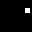

In [281]:
display(img)